In [3]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression
from tqdm.keras import TqdmCallback

#Data Import
df = pd.read_csv('auto-mpg-clean.csv', encoding= 'unicode_escape')
X, y = df.drop(['mpg'], axis =1), df['mpg']

def coeff_determination(y, yhat):
    """ Calculates the R2"""
    from keras import backend as K
    SS_res = K.sum(K.square(y-yhat))
    SS_tot = K.sum(K.square(y -K.mean(yhat)))
    return (1-SS_res/(SS_tot + K.epsilon()))

def r2_adjusted(x, r2):
    """Calculates the R2 Adjusted"""
    m, n = x.shape
    r_df = (m-1)/(m-n)
    return 1-(r_df*(1-r2))
              
def FourL_NN(num_feat, act, epoch, learnrate):
    """ Creates the Sequential Model as dataset has one output, inputs are placed in the model
    followed by 2 hidden layers and then output layer. The optimizer used for the NN is Adam.
    A plot of MSE vs Epochs and R2 vs Epochs is printed at the end. R2, R2 Bar and R2 CV are returned.
    """
    model = Sequential()
    model.add(Input(shape=(num_feat,)))         #Input Layer
    model.add(Dense(units=24, activation=act))  #Hidden Layer 1
    model.add(Dense(units=24, activation=act))  #Hidden Layer 2
    model.add(Dense(units=1))                   #Output Layer
    optimizer = Adam(learning_rate=learnrate)   #Adam used as Optimizer
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', coeff_determination])
    fit_model = model.fit(x=x_train, y=y_train, epochs=epoch, batch_size=32, validation_split=0.2, verbose=0, callbacks=[TqdmCallback()])
    plt.clf()
    plt.plot([i for i in range(epoch)], fit_model.history['mse'], label="mse")
    plt.title(f"{act}: {learnrate}")
    plt.legend()
    plt.show()
    plt.plot([i for i in range(epoch)], fit_model.history['coeff_determination'], label="R2")
    plt.legend()
    return (fit_model.history['coeff_determination'][-1], r2_score(y_test, model(x_test)), r2_adjusted(x_train,fit_model.history['coeff_determination'][-1]))

# 4 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

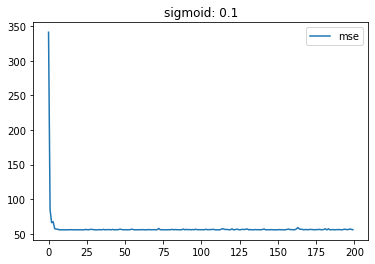

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

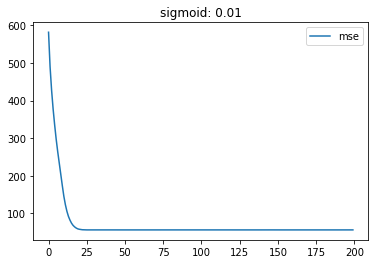

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

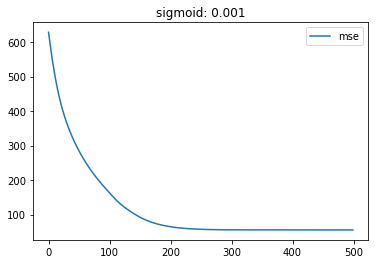

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

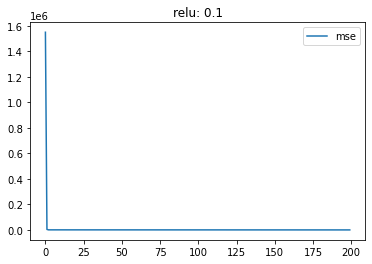

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

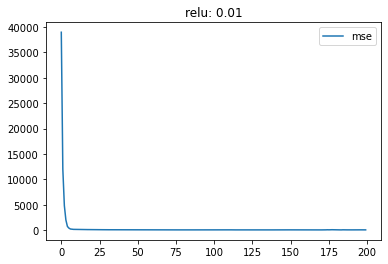

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

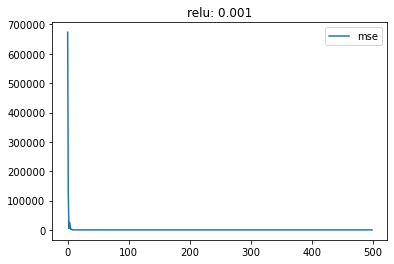

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

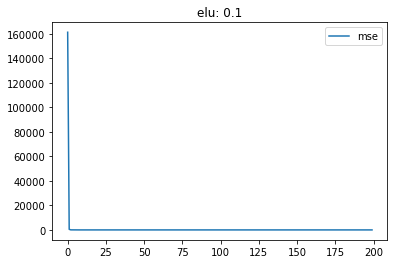

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

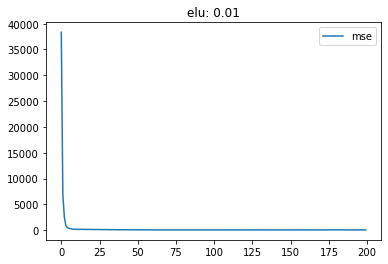

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

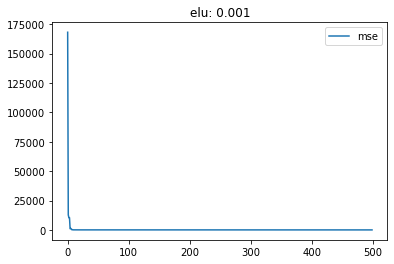

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.100,-1.490116e-08,-0.516527,-0.020067
sigm,0.010,0.000000e+00,-0.418862,-0.020067
sigm,0.001,0.000000e+00,-0.419258,-0.020067
relu,0.100,0.000000e+00,-0.009573,-0.020067
relu,0.010,2.461809e-01,0.297114,0.231054
relu,0.001,2.800406e-01,0.437474,0.265593
elu,0.100,0.000000e+00,-1.010899,-0.020067
elu,0.010,2.498019e-01,-0.064635,0.234748
elu,0.001,2.871423e-01,0.504221,0.272838


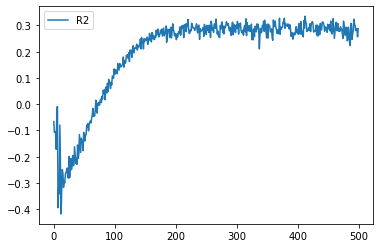

In [4]:
#Splitting datset into training and testing sets (80/20 split)
x_train, y_train = X[-306:].to_numpy(), (y[-306:]).to_numpy()
x_test, y_test   = X[:-306].to_numpy(), (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = FourL_NN(7, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = FourL_NN(7, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = FourL_NN(7, 'sigmoid', 500, 0.001)
 
relu1, relu_cv1, relu_bar1 = FourL_NN(7, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = FourL_NN(7, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = FourL_NN(7, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = FourL_NN(7, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = FourL_NN(7, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = FourL_NN(7, 'elu', 500, 0.001)

#Output
R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])
R2s

# Forward 4 Layer Model

In [ ]:
#Selecting features to feed the NN with forward selection and splitting training and testing sets (80/20)
reg = LinearRegression() 
sfs = SequentialFeatureSelector(estimator=reg)
sfs.fit(X,y)
forward = sfs.transform(X)
x_train, y_train = forward[-306:], (y[-306:]).to_numpy()
x_test, y_test   = forward[:-306], (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = FourL_NN(3, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = FourL_NN(3, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = FourL_NN(3, 'sigmoid', 500, 0.001)

relu1, relu_cv1, relu_bar1 = FourL_NN(3, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = FourL_NN(3, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = FourL_NN(3, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = FourL_NN(3, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = FourL_NN(3, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = FourL_NN(3, 'elu', 500, 0.001)

#Output
forward_R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])

forward_R2s

In [ ]:
elu1, elu_cv1, elu_bar1 = FourL_NN(3, 'elu', 800, 0.0000001)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]